In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")



**1. Loading the data**


In [3]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


**2. Exploring the data**

In Data Analysis We will Analyze To Find out the below stuff

Missing Values

All The Numerical Variables

Distribution of the Numerical Variables

Categorical Variables

Cardinality of Categorical Variables

Outliers

Relationship between independent and dependent feature(SalePrice)

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data Preprocessing

In [7]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [8]:
df.duplicated().sum()

0

Missing Values


In [12]:
# Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


Since there are many missing values we need to find the relationship between missing values and Sales price, to check if we can drop that or is there dependency between that.

In [104]:
more_than_50_percent_misssing_value_features = [features for features in features_with_na if (np.round(df[features].isnull().mean(),4)) > 0.5]

In [105]:
more_than_50_percent_misssing_value_features

[]

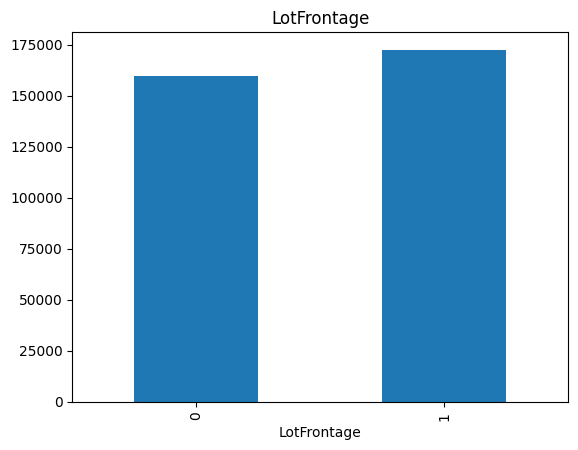

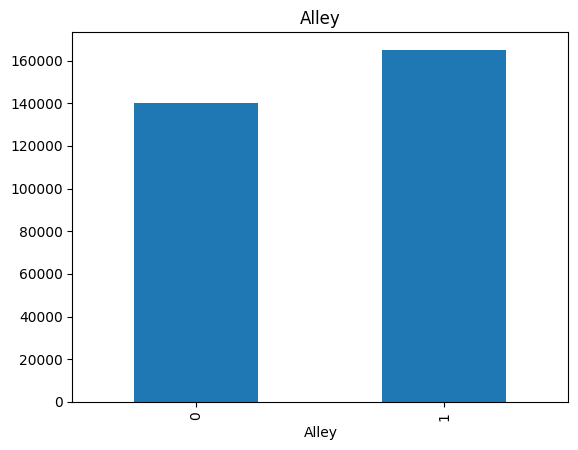

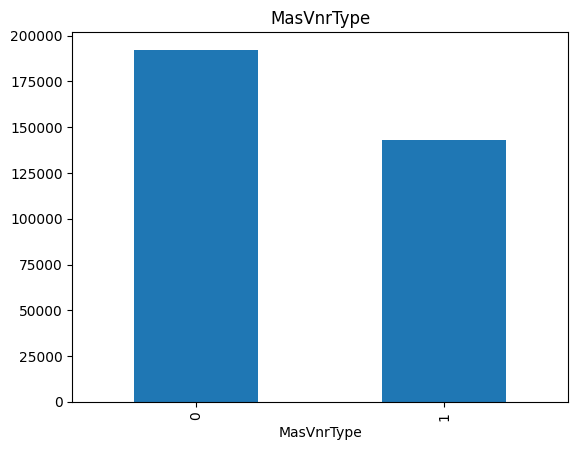

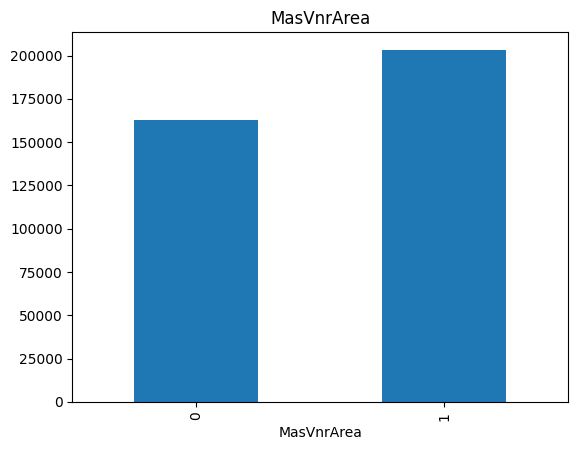

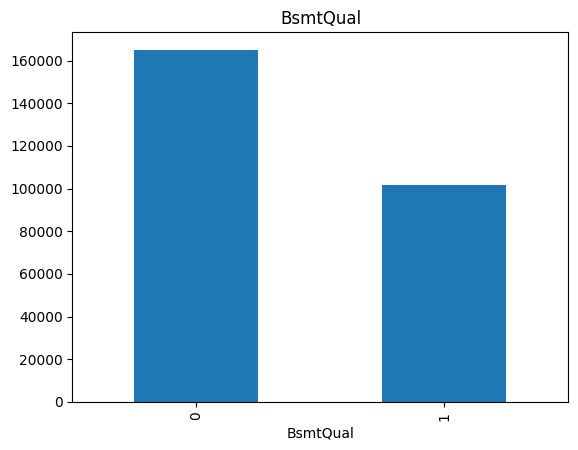

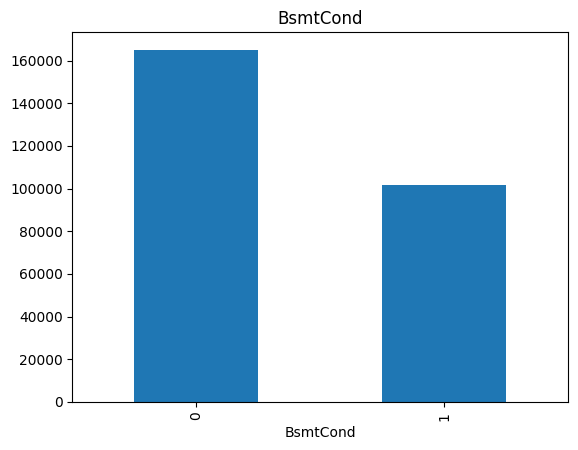

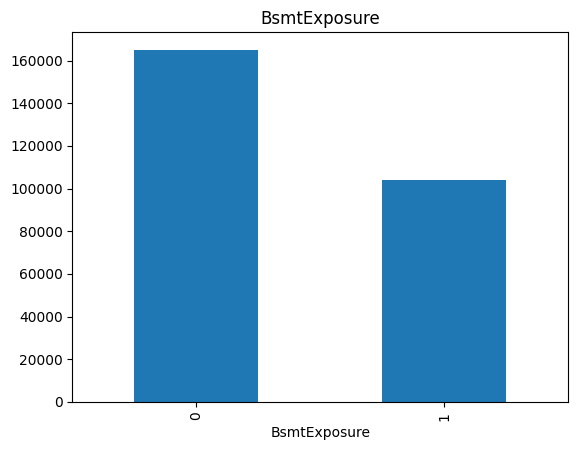

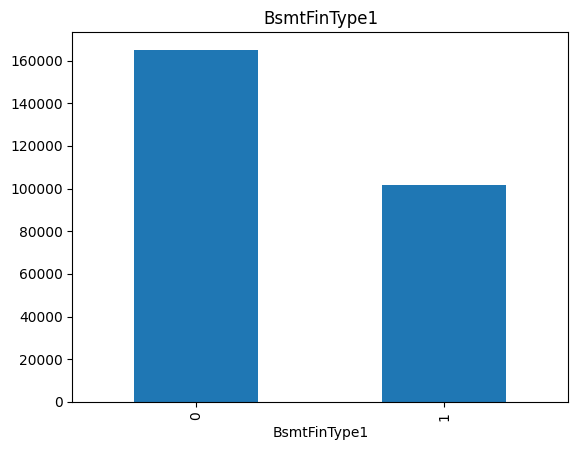

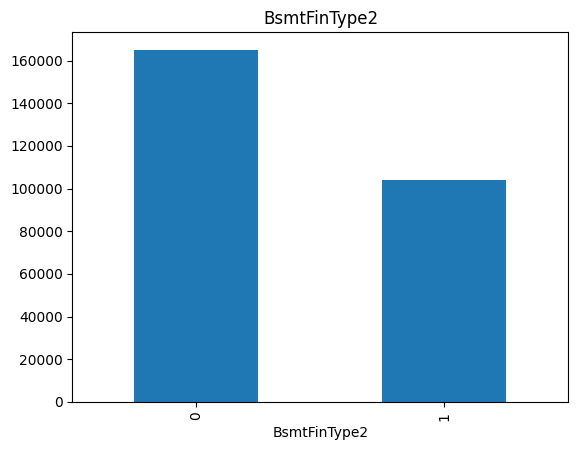

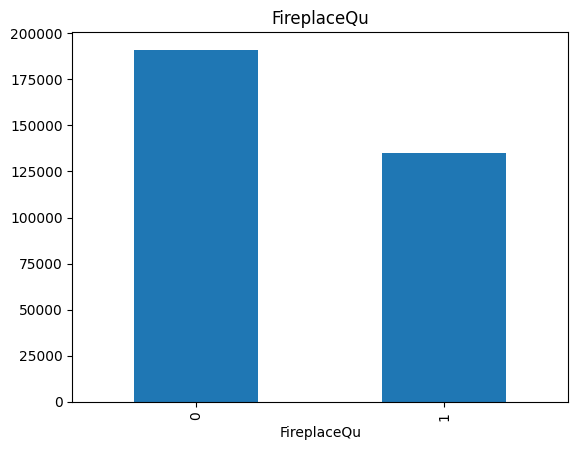

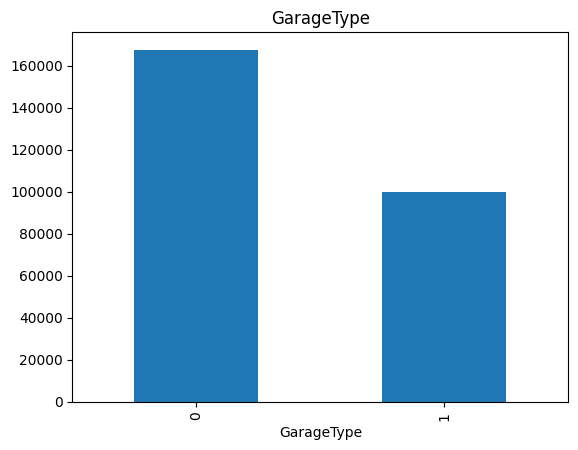

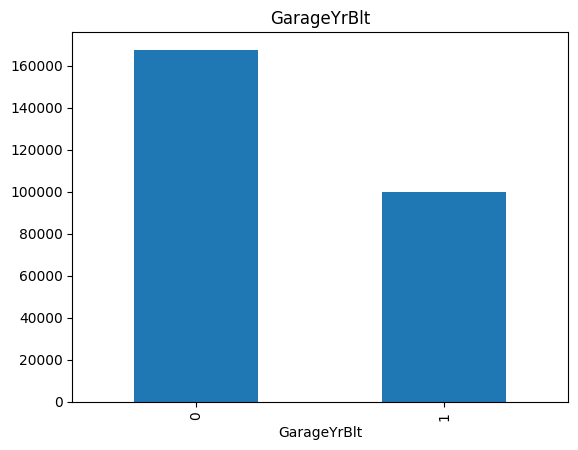

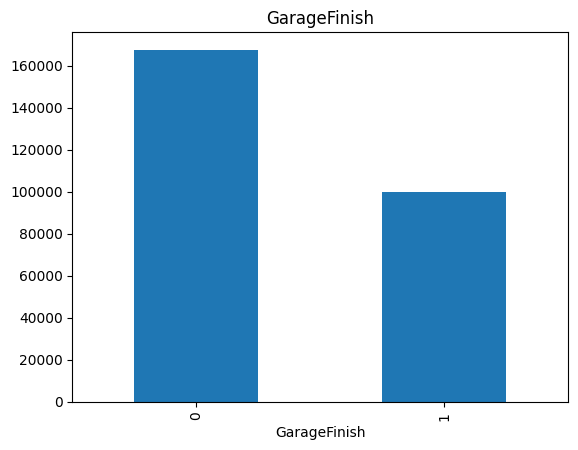

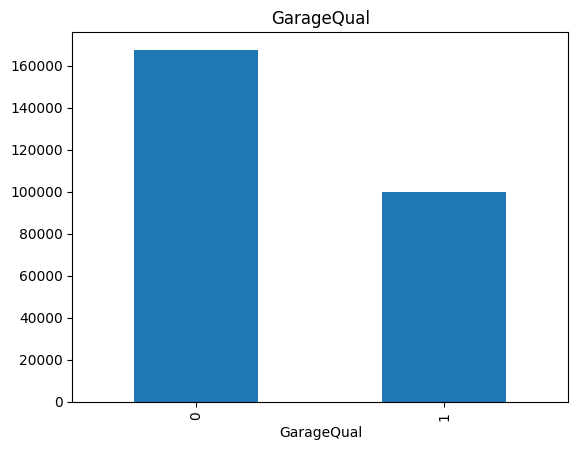

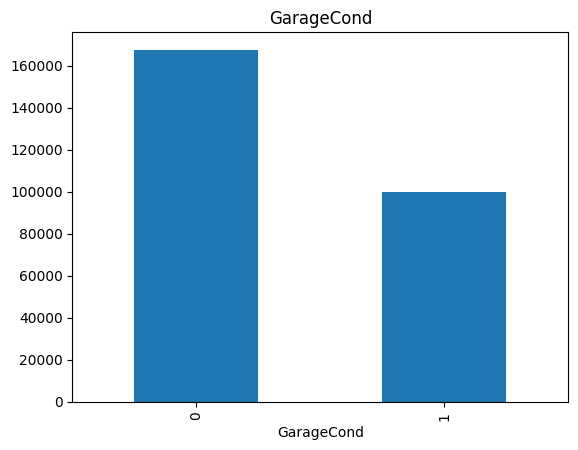

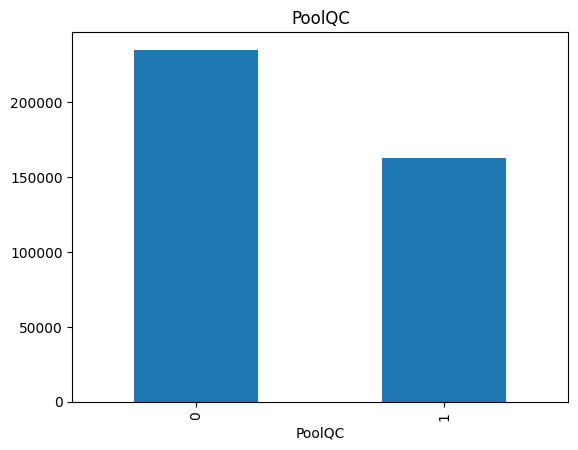

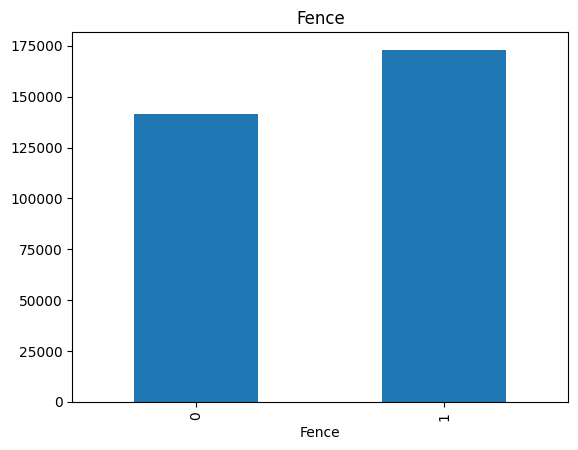

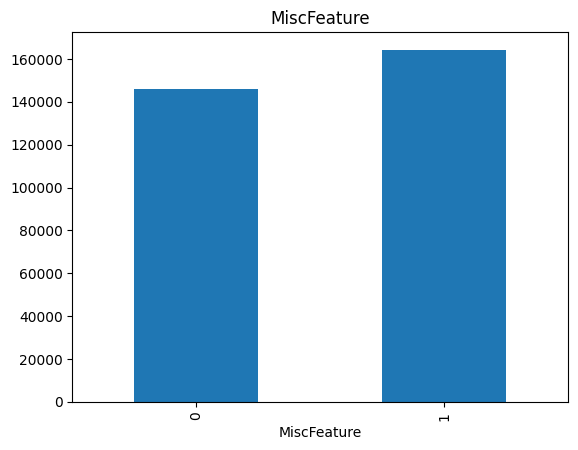

In [14]:
for feature in features_with_na:
  data=df.copy()
  # let's make a variable that indicates 1 if the observation was missing or zero if it didn't have a null values
  data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible as null values was converted to 1 and it has a high median value in y axis we can see that.So We need to replace these nan values with something meaningful which We need to replace these missing values with meaningful data.
Now we see the which features are having numerical data.

In [16]:
#Numerical Variables

In [20]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'object']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


So we see that there are 38 features which are numerical.
Also we see that, some columns are having year.So we try to find out the fields which contain year information.As these will be used to calculate the age of house

In [ ]:
#Temporal Variables(Eg: Datetime Variables)


In [21]:
#list of variables thaat contain year info
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [23]:

# let's explore the content of these year variables
for feature in year_feature:
    print(feature, sorted(df[feature].unique()))

YearBuilt [1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
YearRemodAdd [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 200

Text(0.5, 1.0, 'House Price vs YearSold')

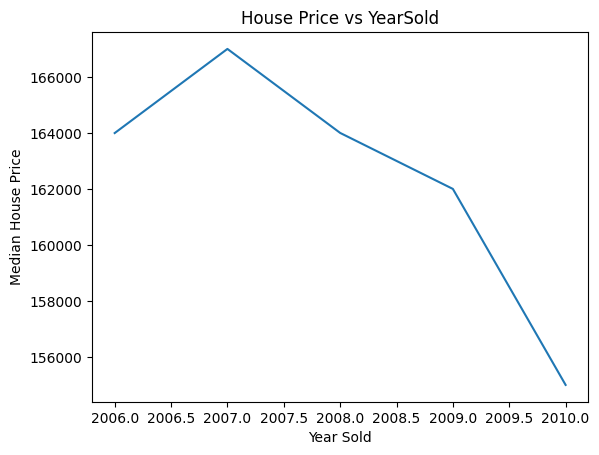

In [25]:
#Observing the SalesPrice as per the year sold

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

We observe that the price is decresing as the years are more recent, which is very strange, so we look further

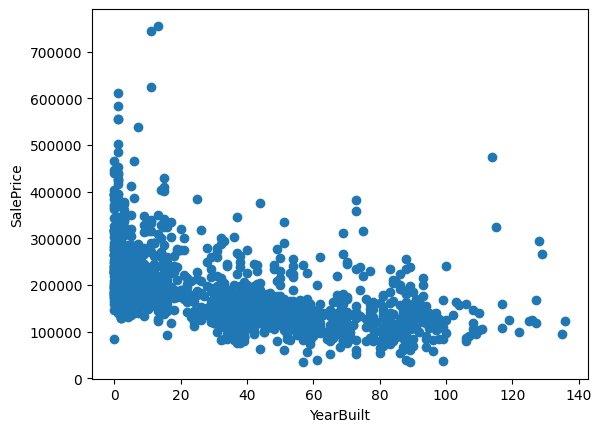

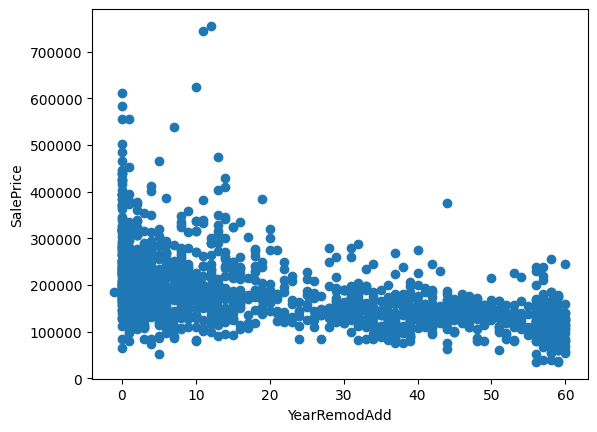

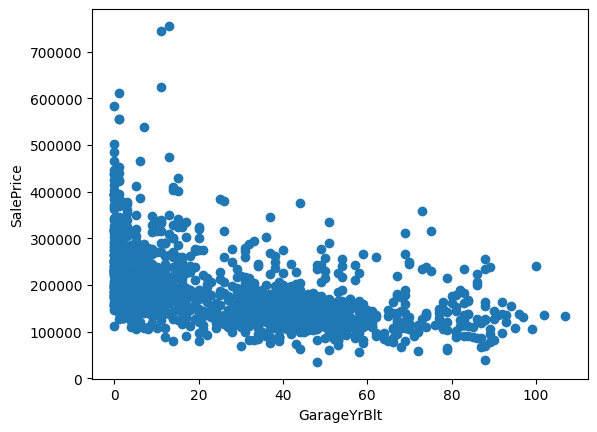

In [27]:

## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [28]:

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [29]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [31]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12



We see that ther are 17 discrete variables

We try to explore its relation with SalePrice

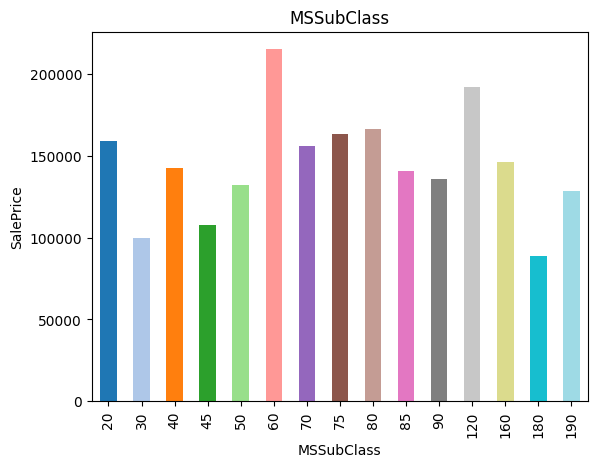

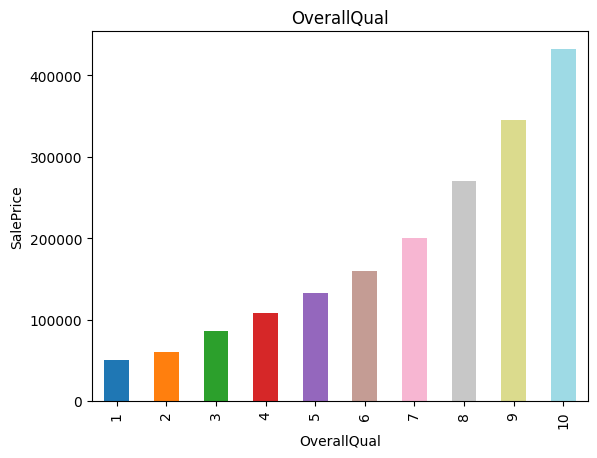

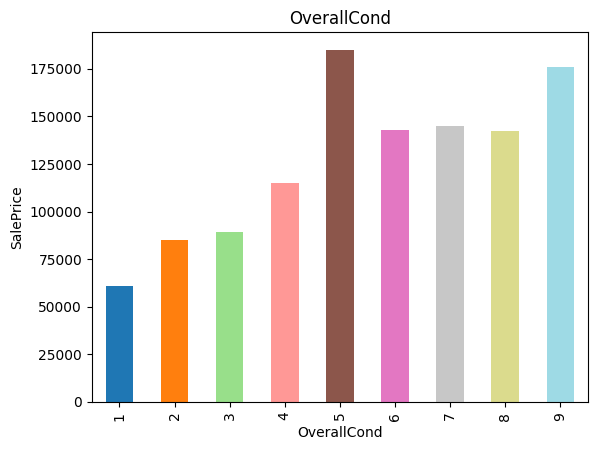

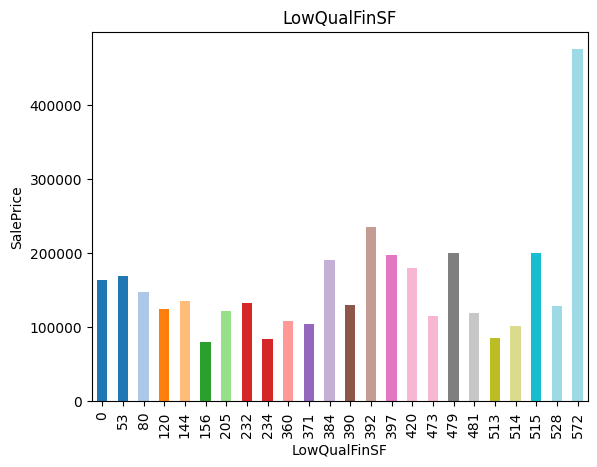

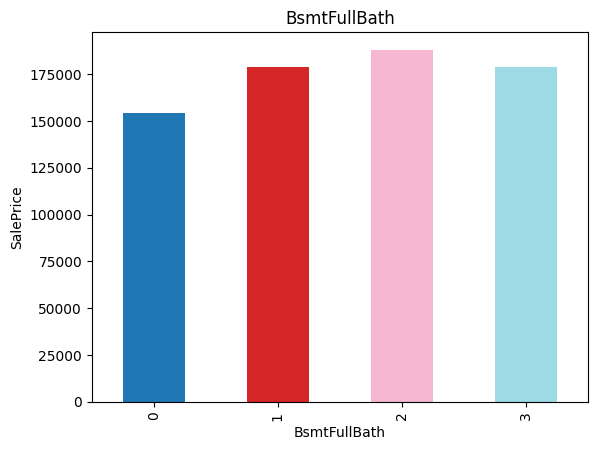

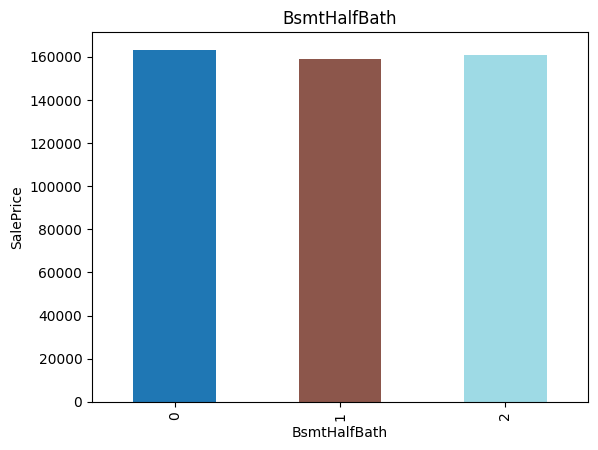

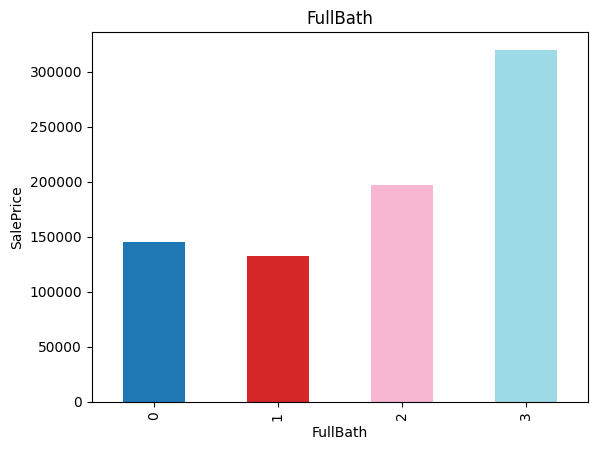

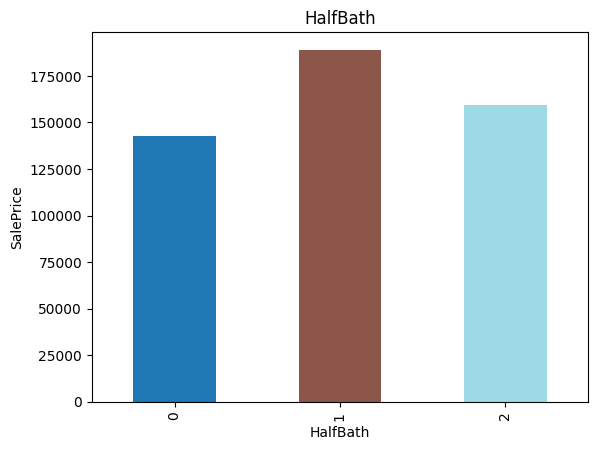

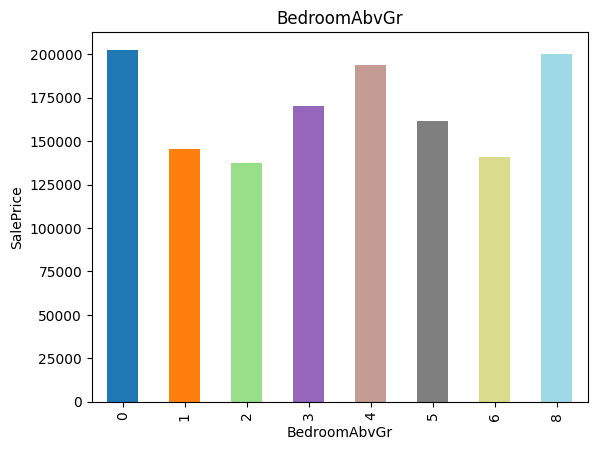

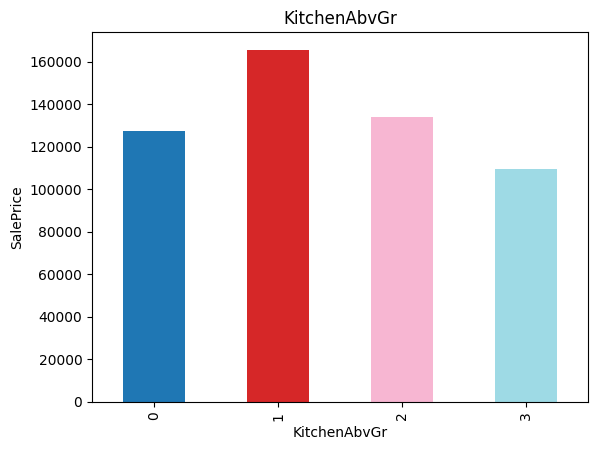

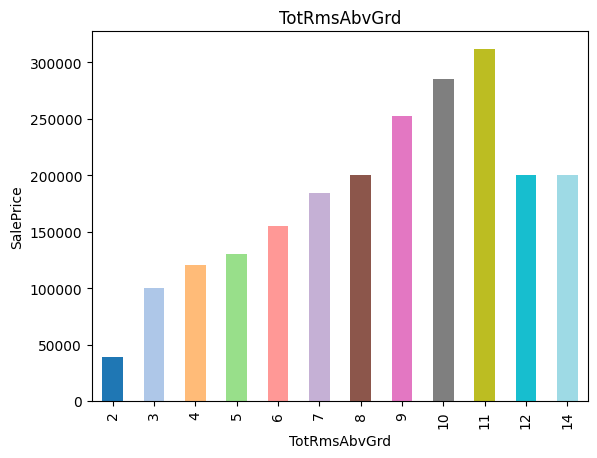

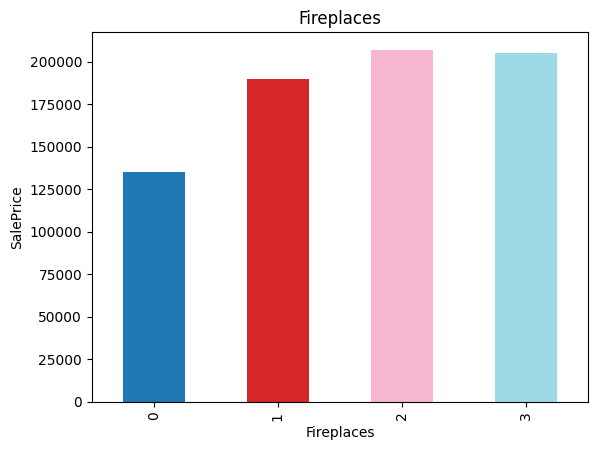

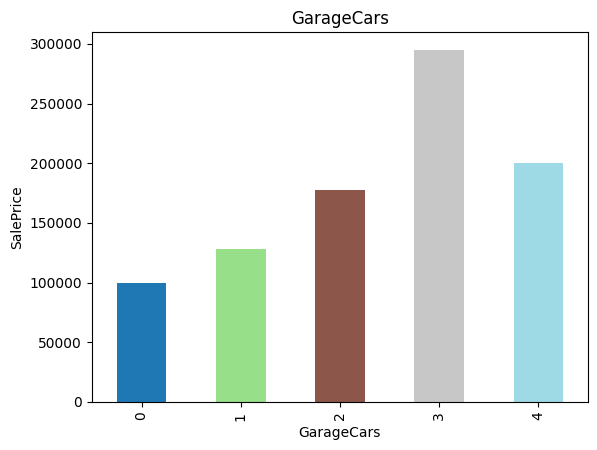

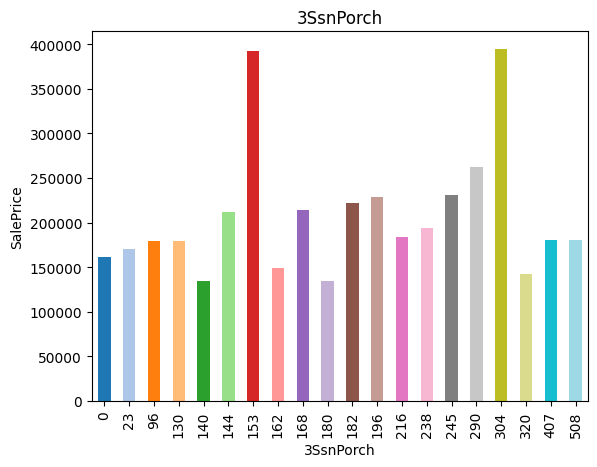

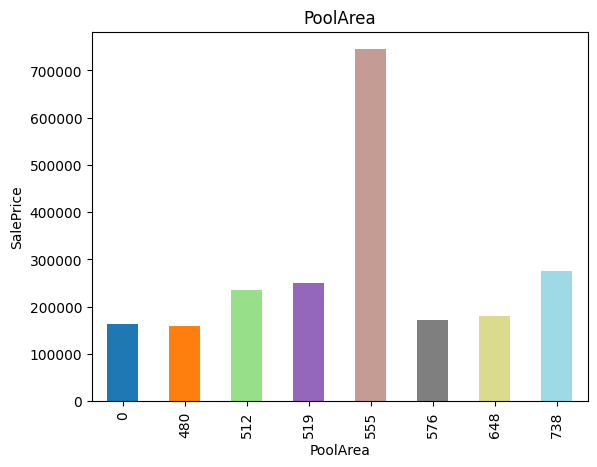

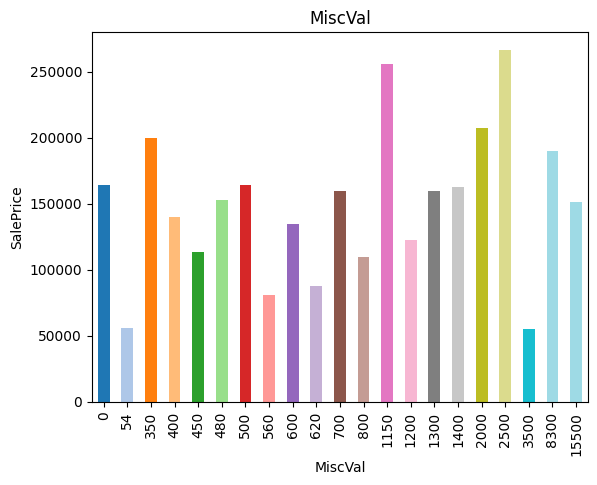

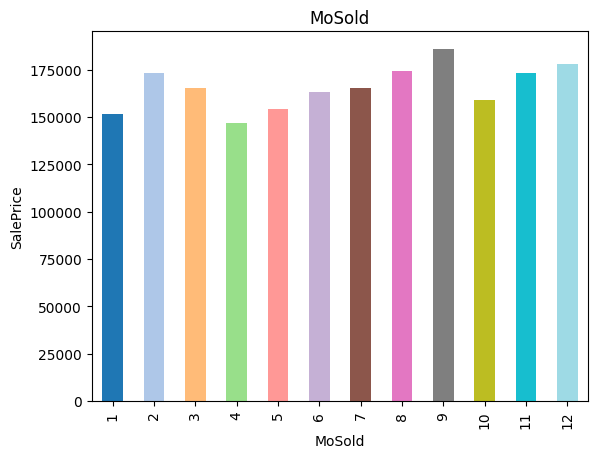

In [32]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data = df.copy()
    # Get the colormap and extract the colors
    colormap = plt.cm.get_cmap('tab20', len(data.groupby(feature)))
    colors = [colormap(i) for i in range(len(data.groupby(feature)))]  # Get a list of colors
    data.groupby(feature)['SalePrice'].median().plot.bar(color=colors)  # Apply colors to the bar chart
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


from this we can understand that there is a relationship between these values and sales price in some cases its monotonically exponenetially increasing as in the acse of  overallqual feature

In [33]:
# Continous Variable

In [37]:

continous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [38]:
continous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

Using histograms for continous numerical variable to study the pattern

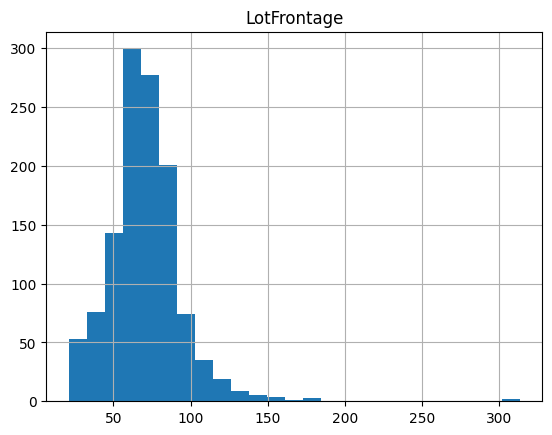

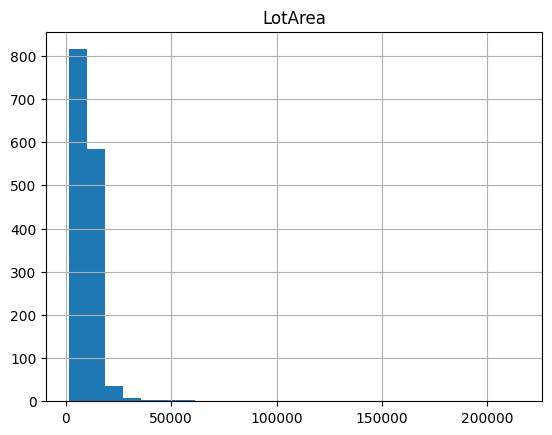

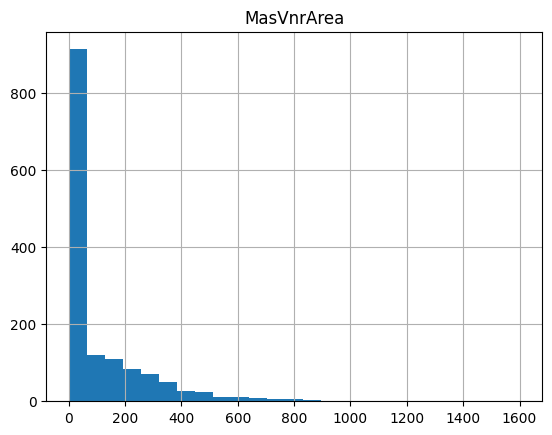

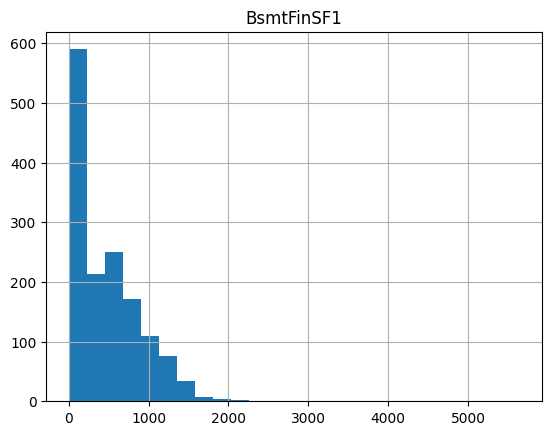

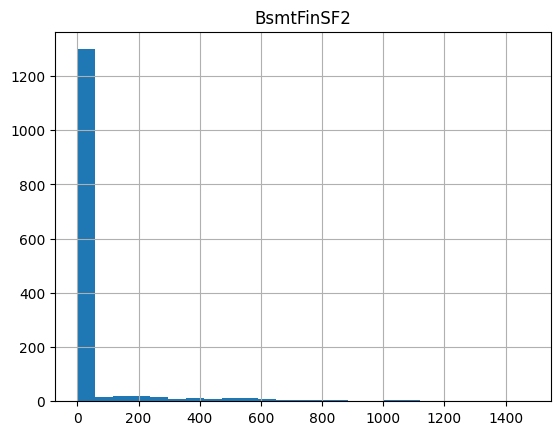

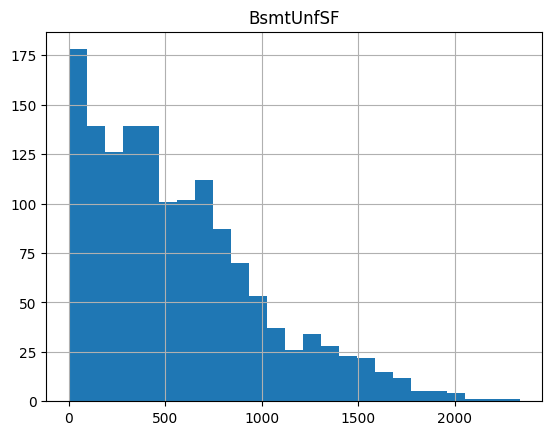

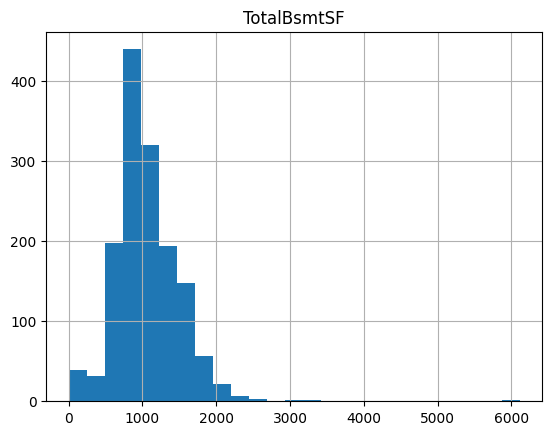

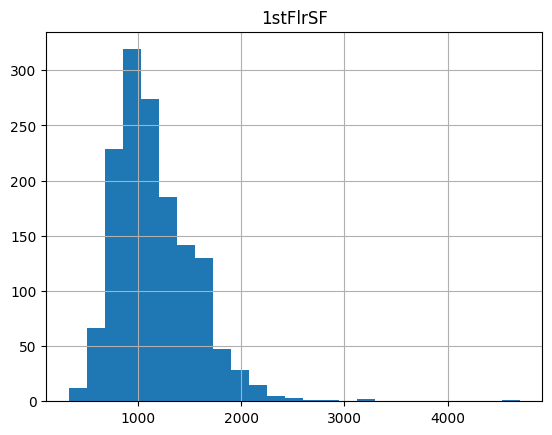

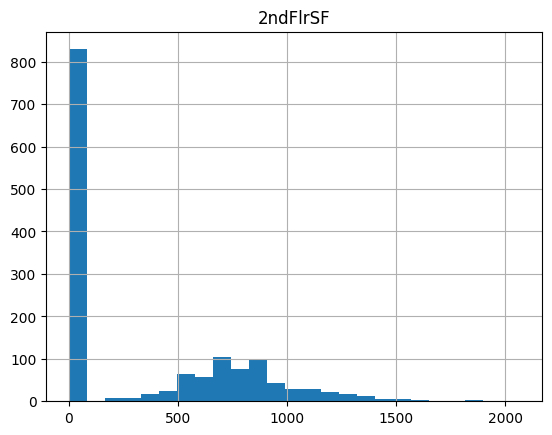

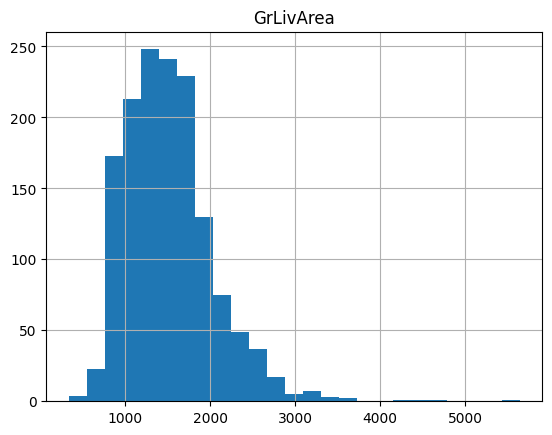

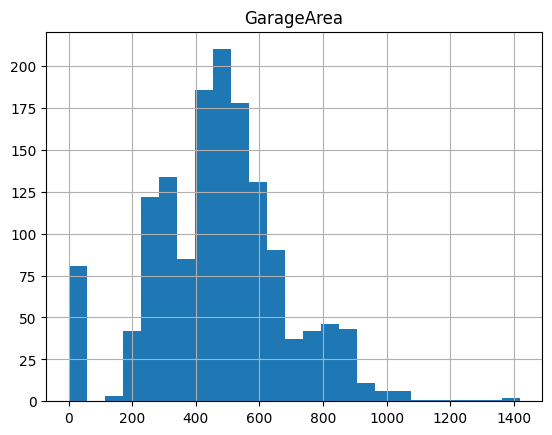

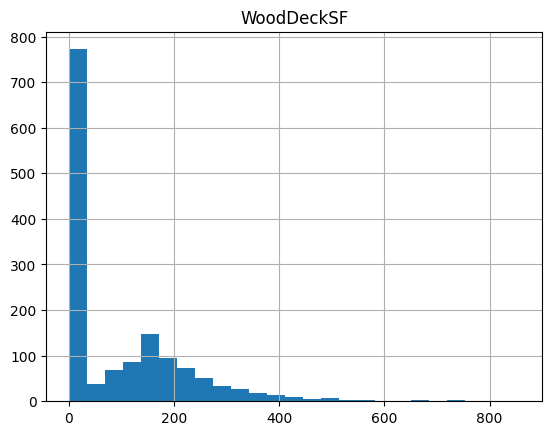

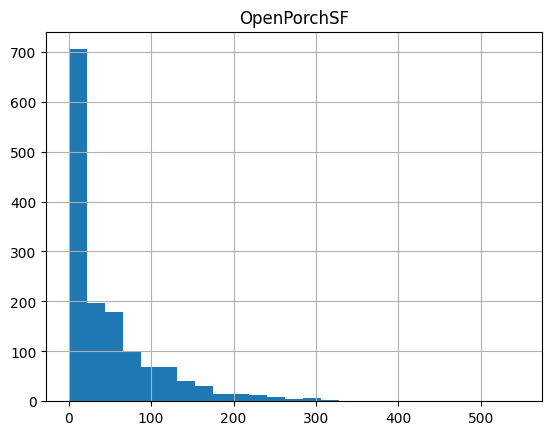

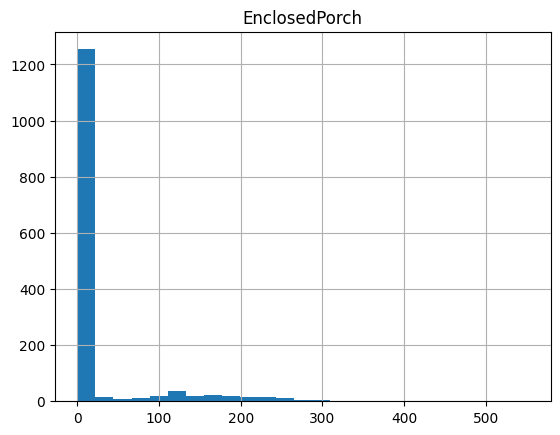

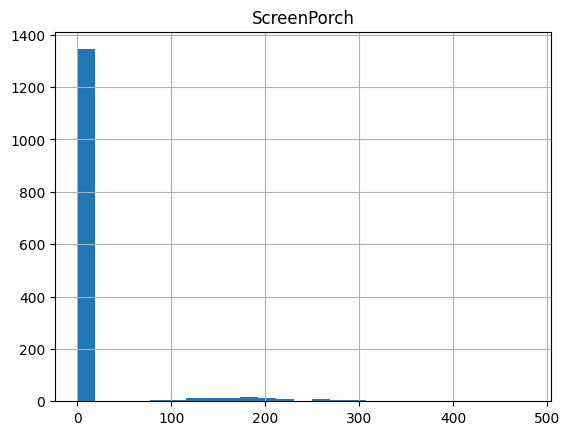

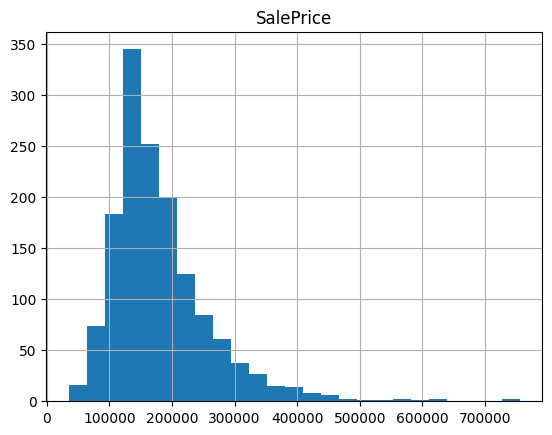

In [41]:
for feature in continous_feature:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)

    plt.show()

some of the features has a gaussain features others are not and some are skewed so we'll do normalization and try to convert this into gaussian distribution because its very useful in regression analysis

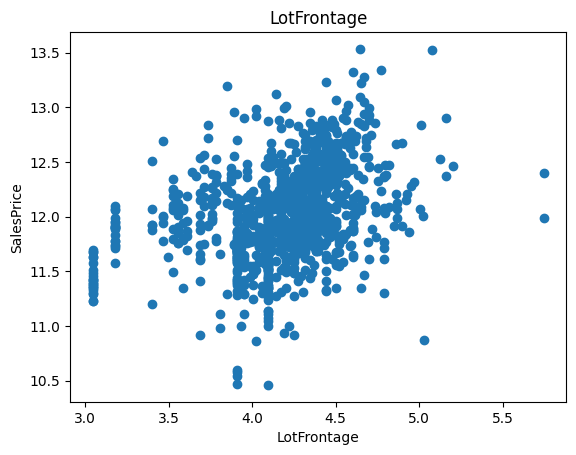

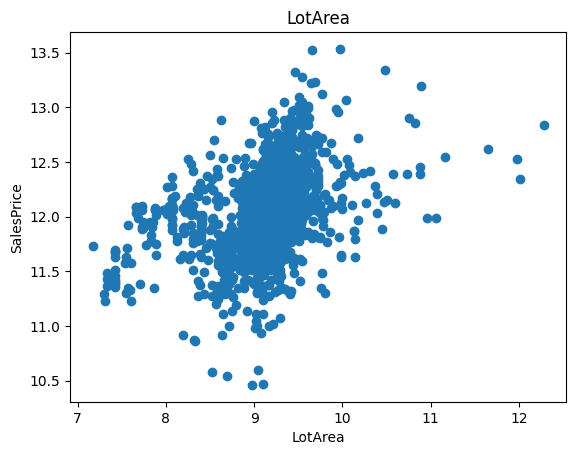

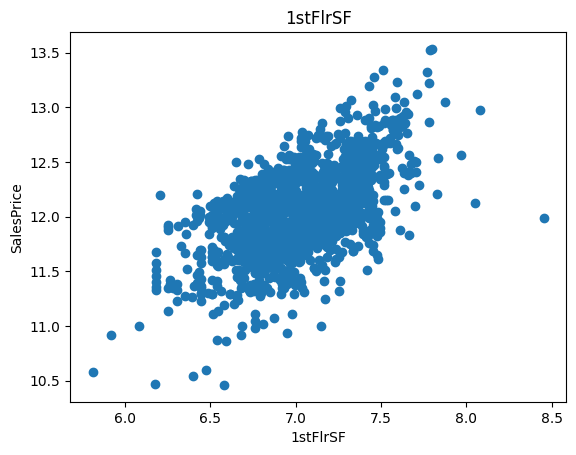

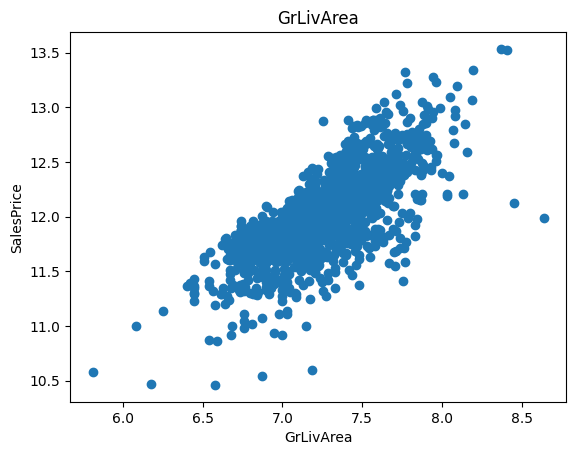

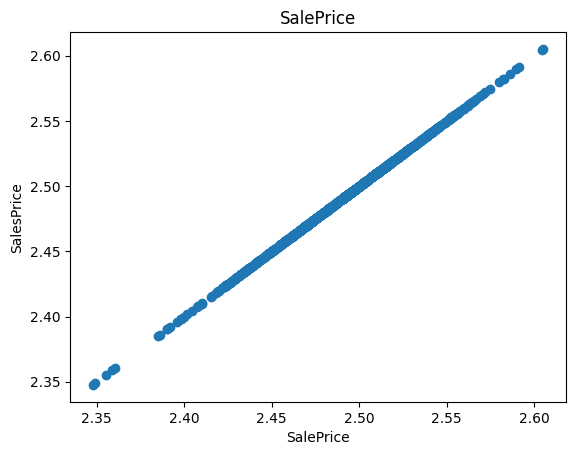

In [42]:

## We will be using logarithmic transformation


for feature in continous_feature:
    data=df.copy()
    #Logarithmic transformation cannot be applied to zero or negative values, as the logarithm of zero is undefined.
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


We see that there is a positive correlation betweent the features and the SalePrice, This transformation compresses large values and stretches smaller values, making the distribution more normal (Gaussian-like) and reducing skewness.

In [43]:
# Outliers


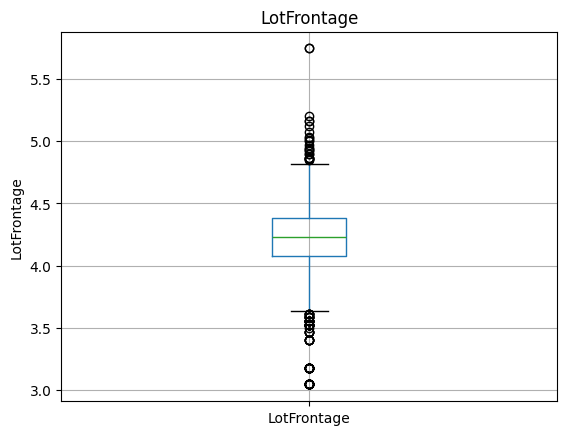

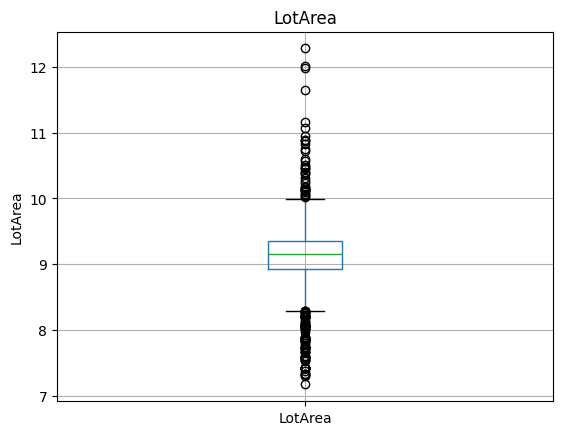

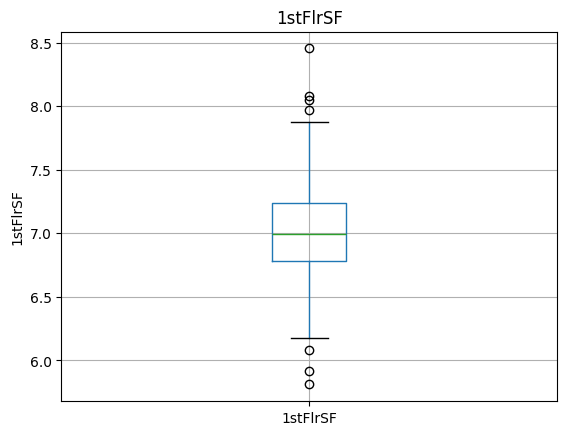

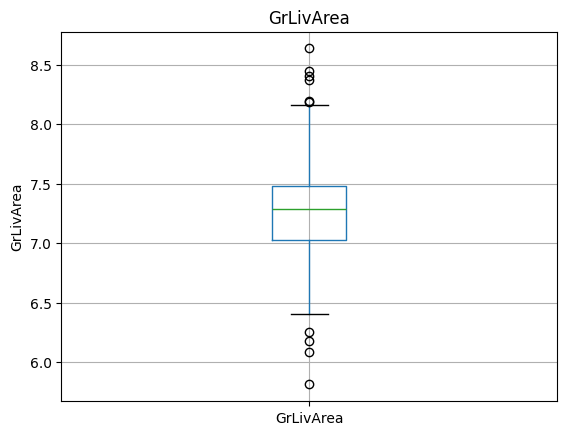

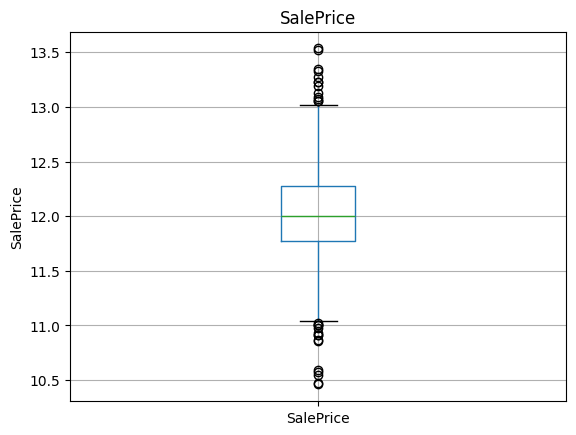

In [44]:
for feature in continous_feature:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [45]:
#Categorical features

In [47]:
categorical_features=df.select_dtypes(include='object')
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 2
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 15
Distinct categories for Exterior2nd  are 16
Distinct categories for MasVnrType  are 4
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

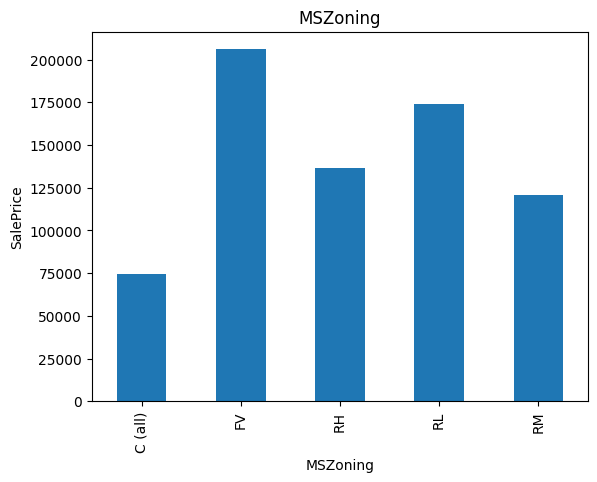

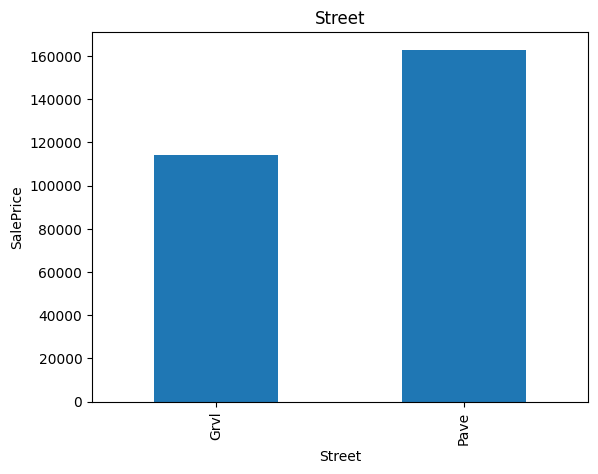

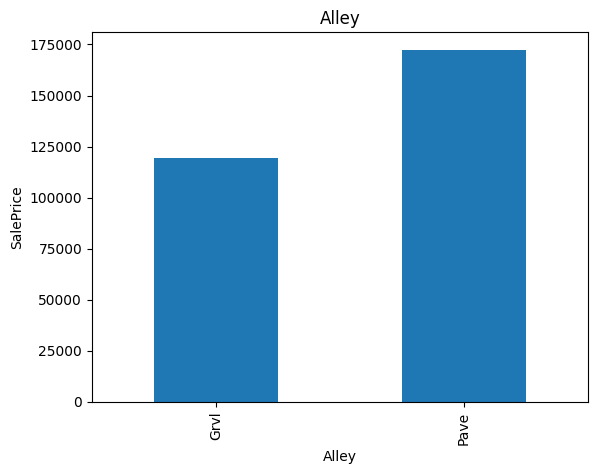

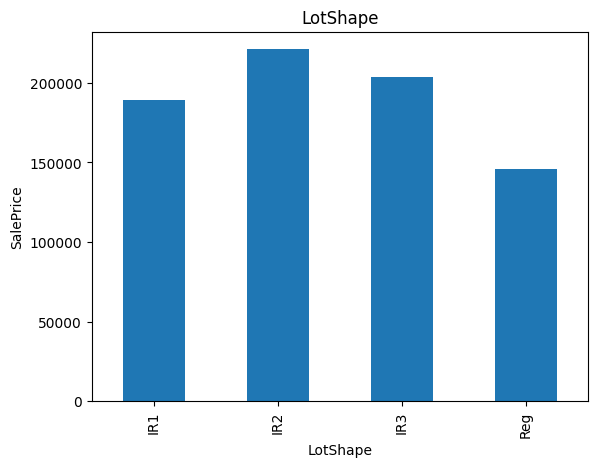

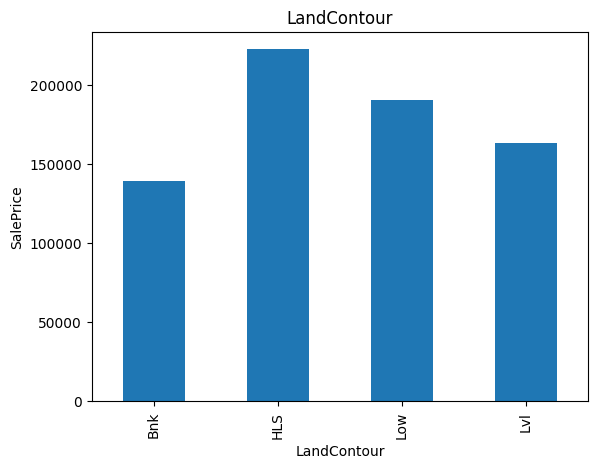

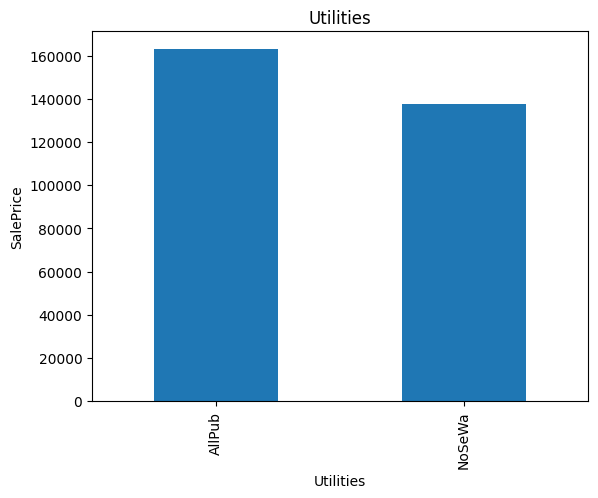

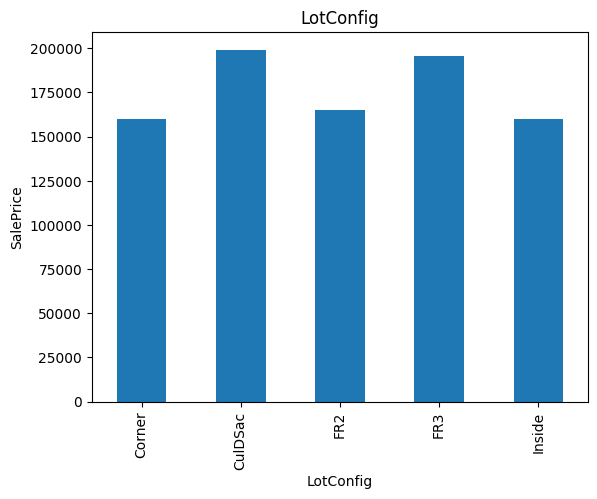

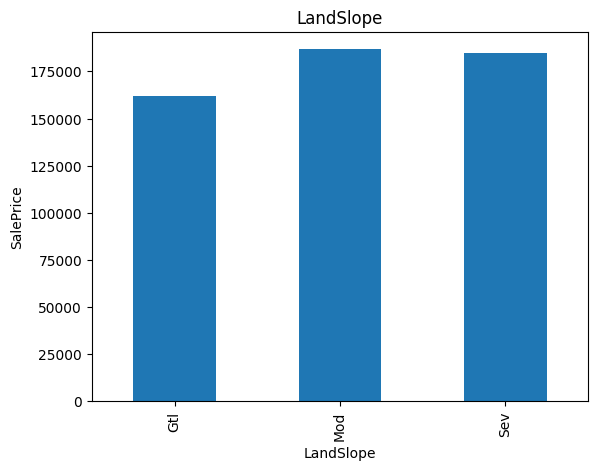

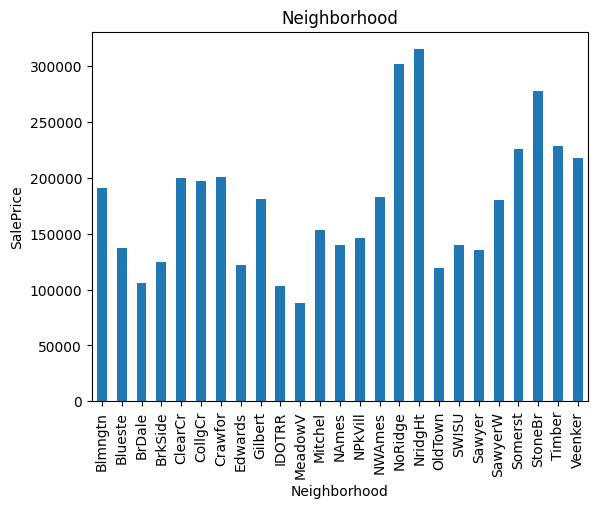

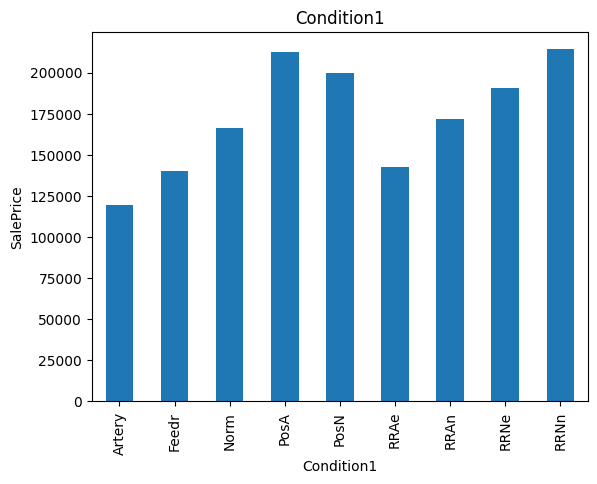

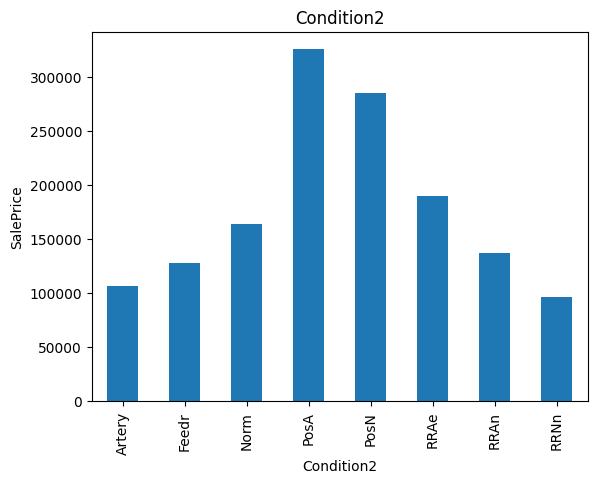

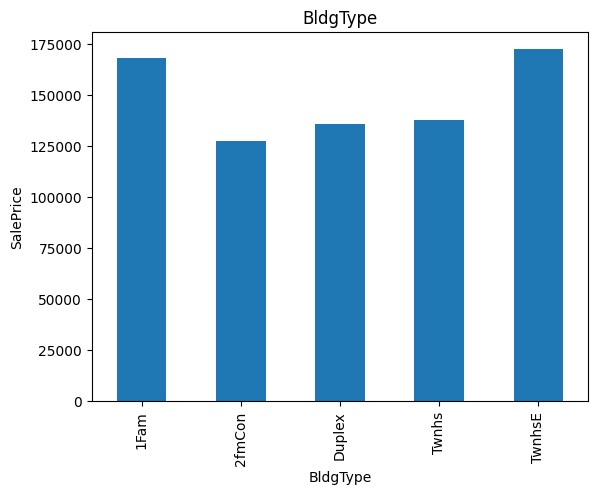

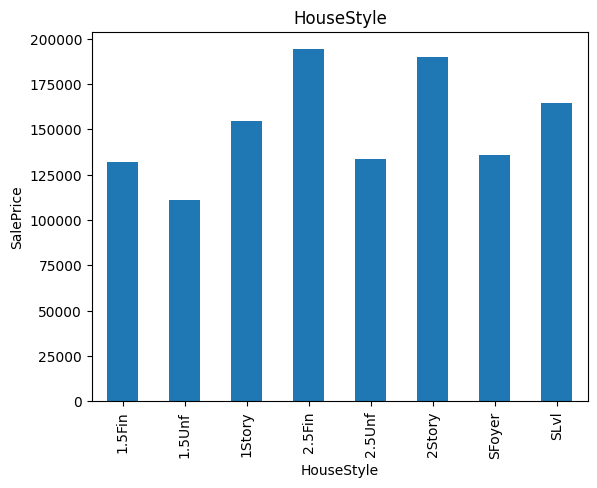

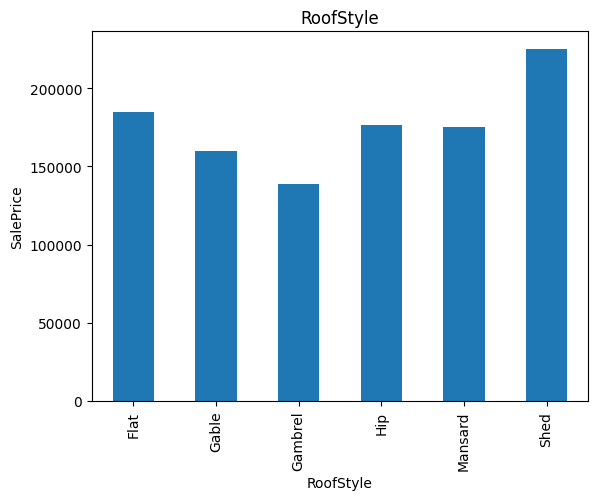

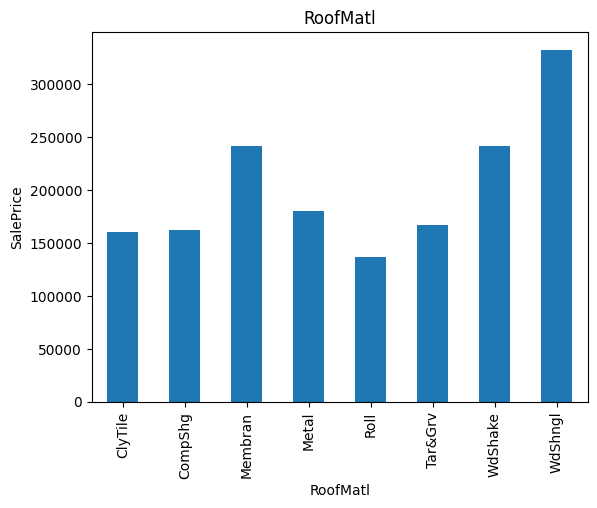

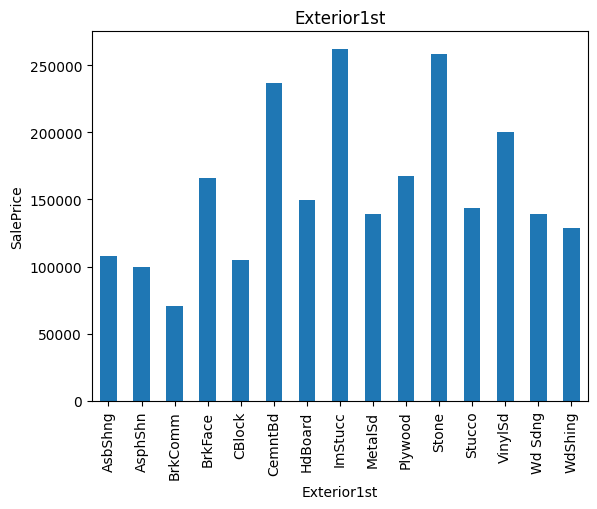

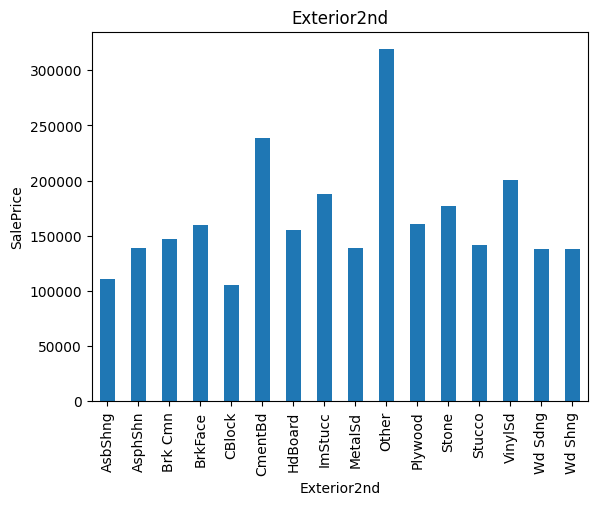

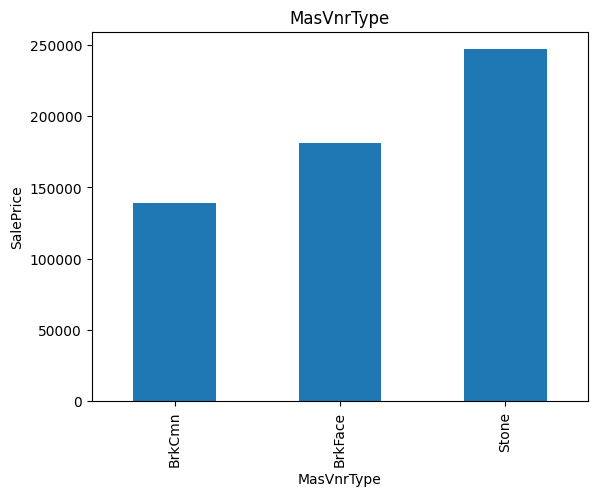

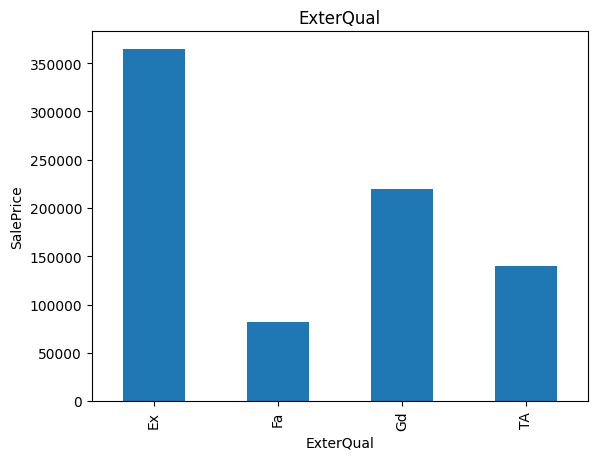

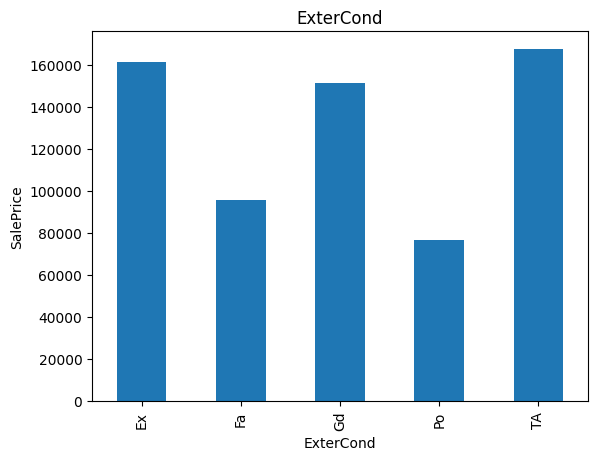

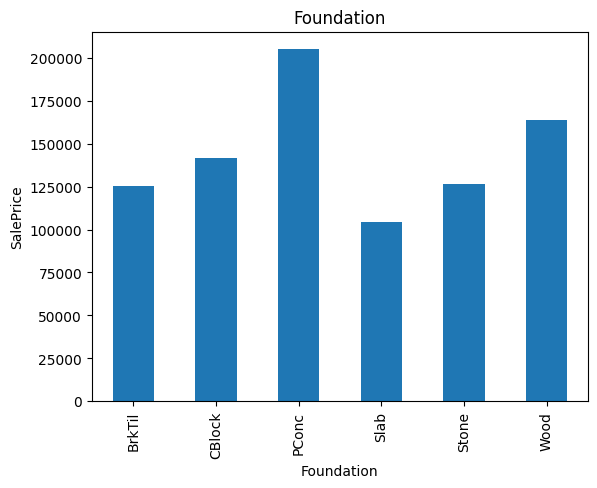

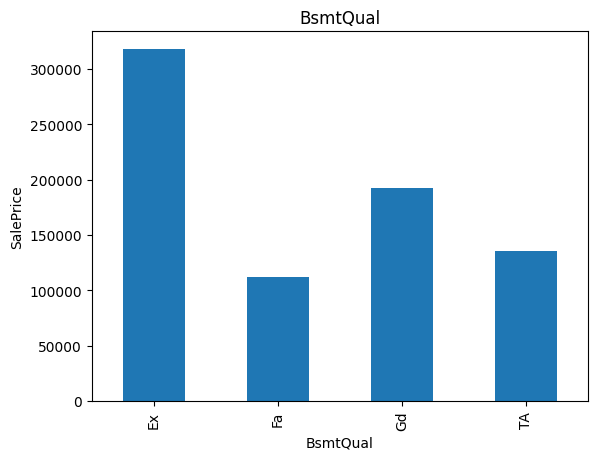

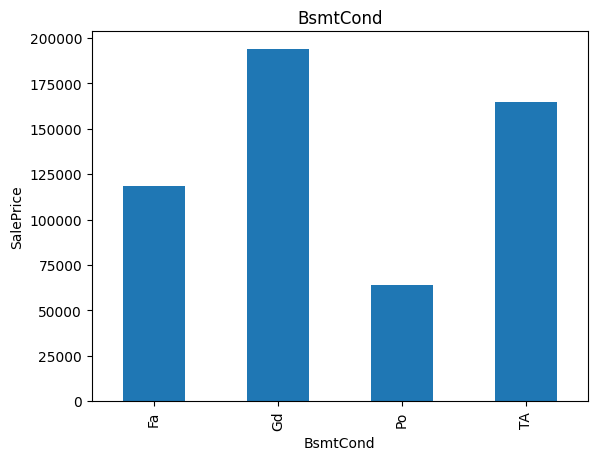

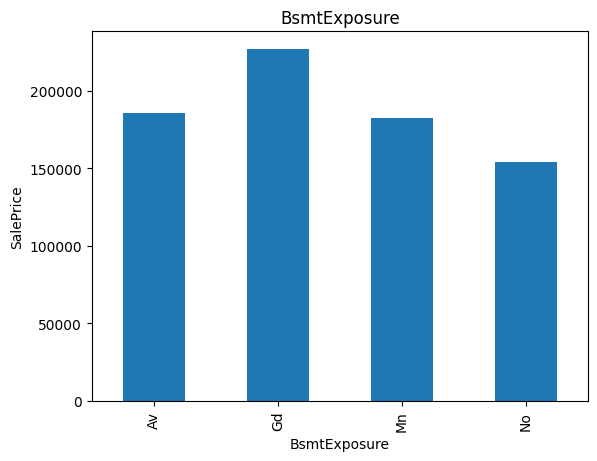

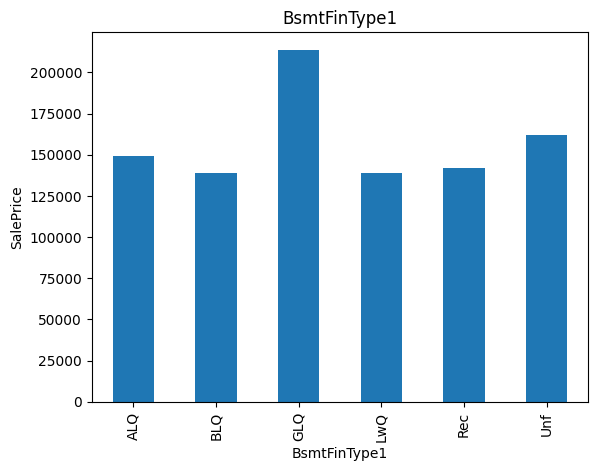

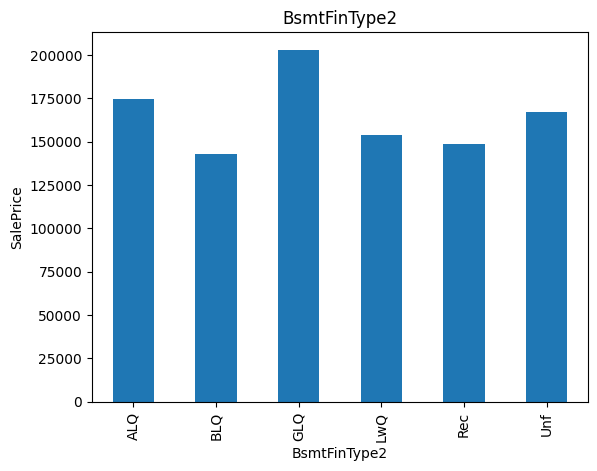

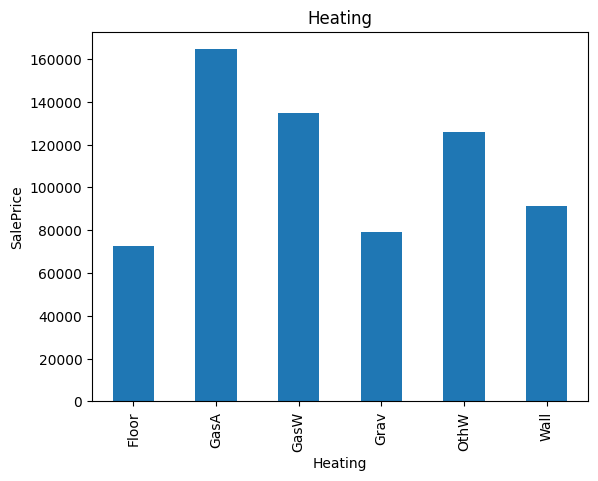

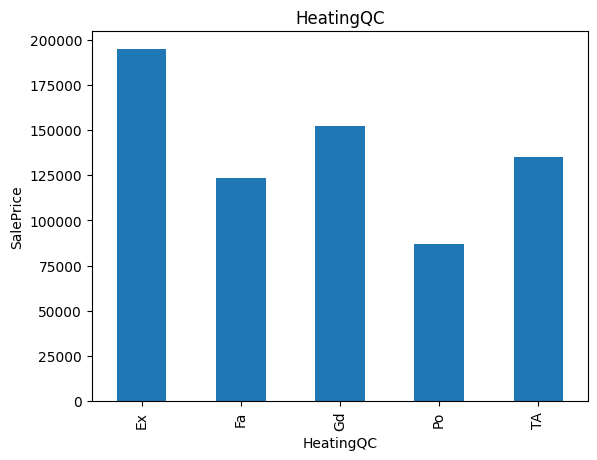

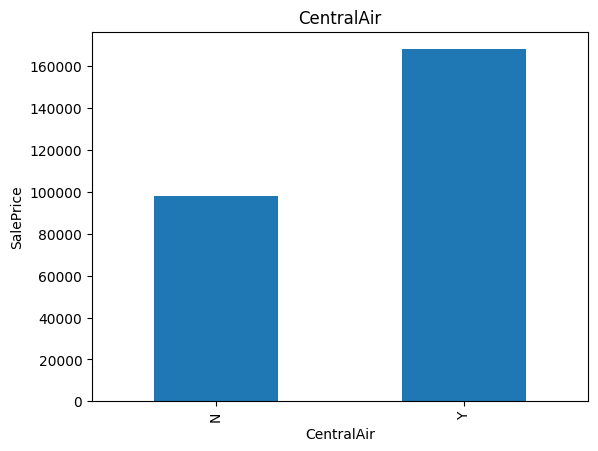

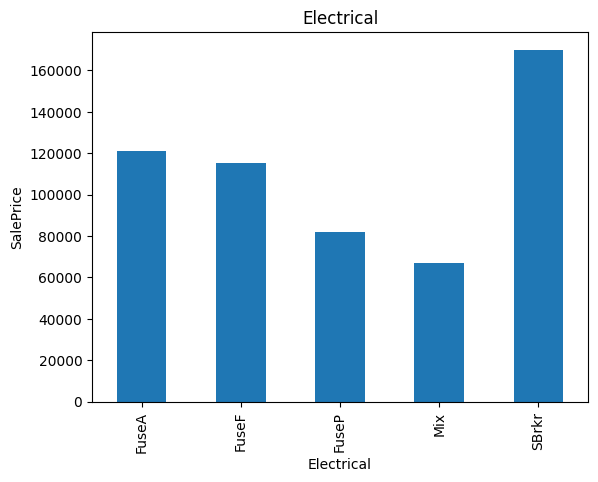

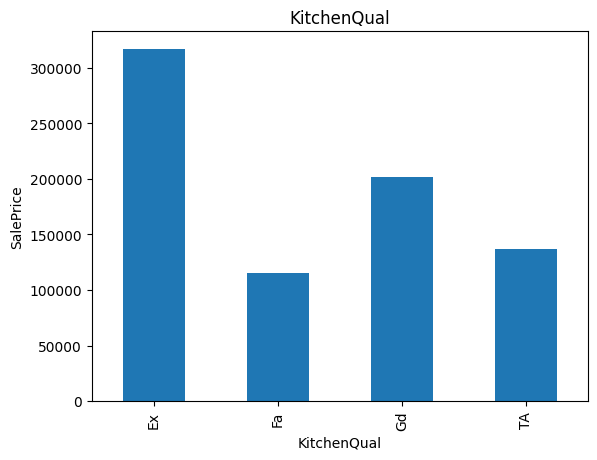

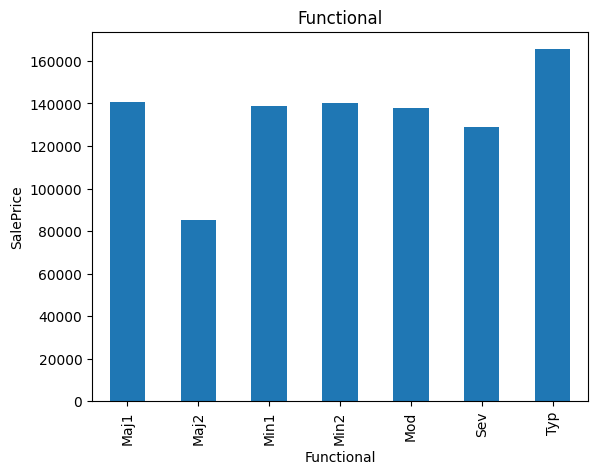

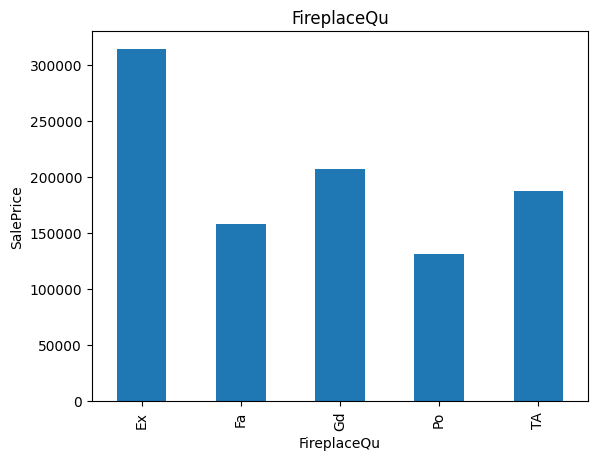

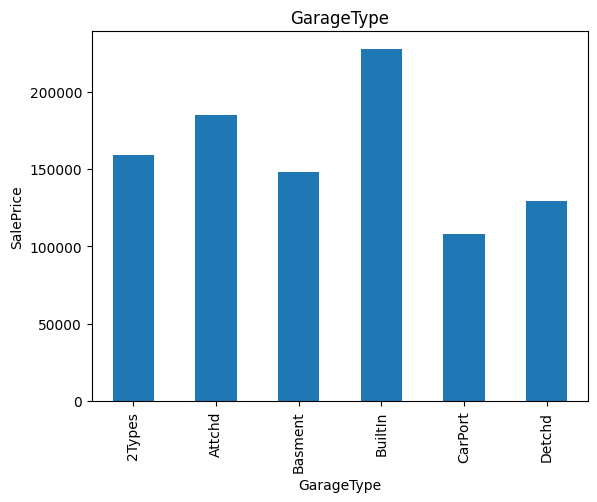

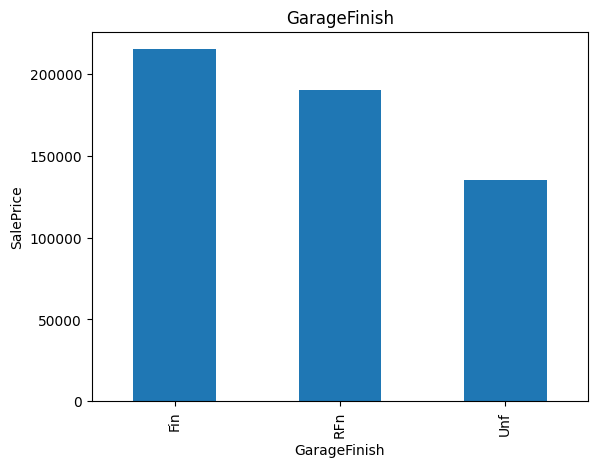

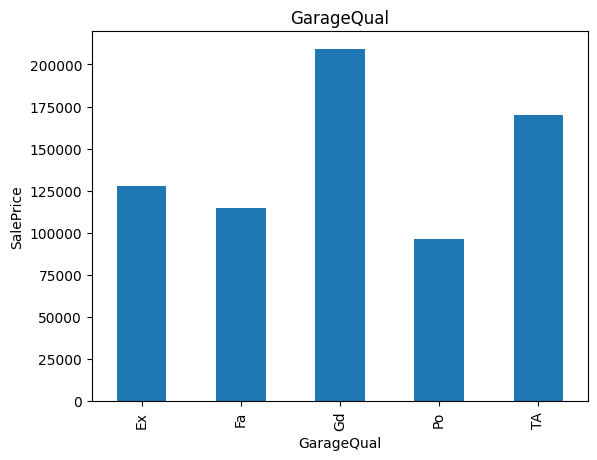

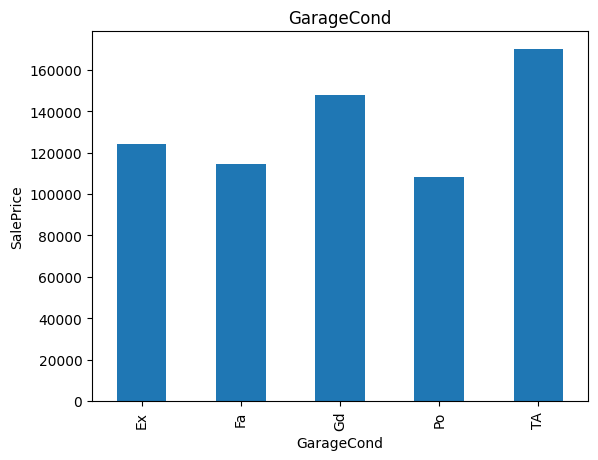

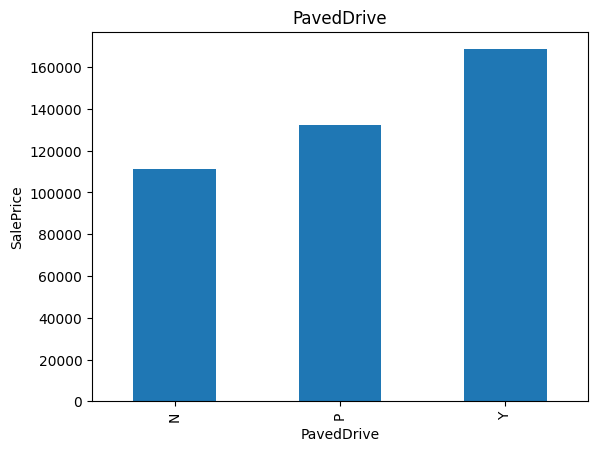

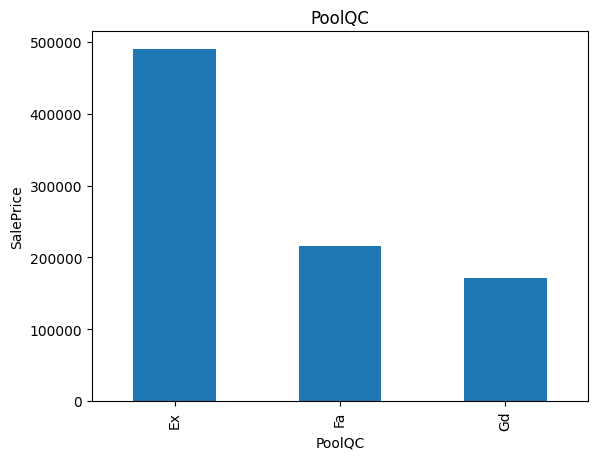

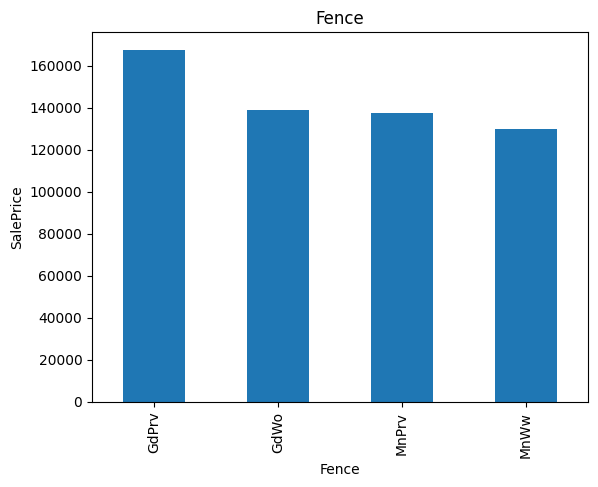

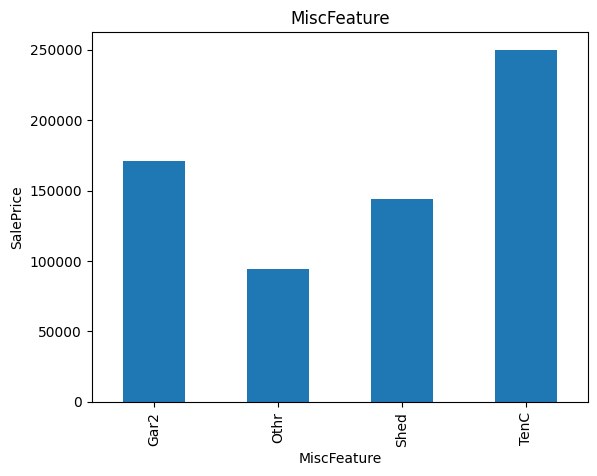

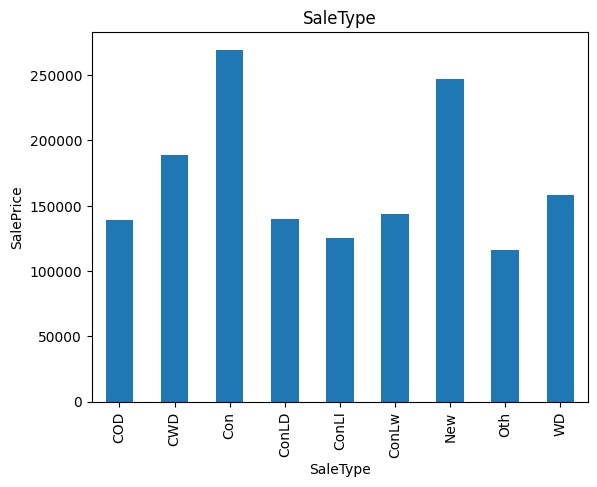

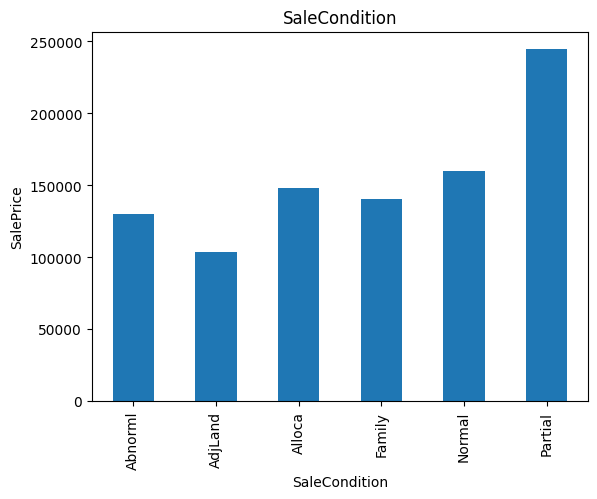

In [49]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [50]:
df_test.shape

(1459, 80)

In [52]:
#We see that there are 79 features


**3. Data cleaning**


3.1 Missing value handling

Filling the missing value we need to see the test and train data simultaneously.
We will be replacing the null values with mode for categorical values, discrete numerical values and year variables
We will be replacing the null values with mean for continous numerical values.
We will delete columns with more than 50% null values as the available information add no value for our model.

<Axes: >

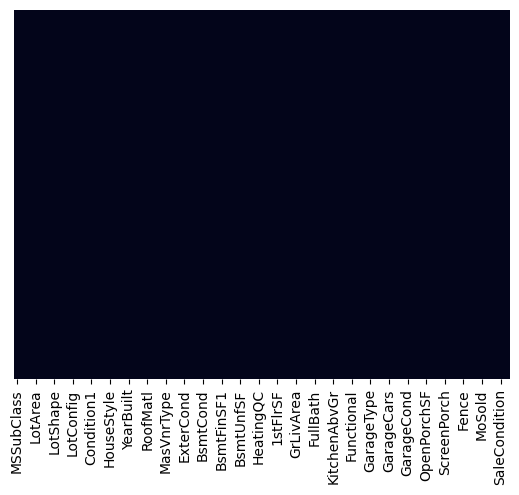

In [107]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [98]:
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test

In [99]:
for feature in discrete_feature:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test

In [100]:
for feature in year_feature:
    df[feature] = df[feature].fillna(df[feature].mode()[0])                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mode()[0])  #test

In [60]:
# as sales price is absent in test data so we want to remove it from the feature list
continous_numerical_features = [feature for feature in continous_features if feature not in 'SalePrice']

In [61]:
for feature in continous_numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())                 #train
    df_test[feature] = df_test[feature].fillna(df_test[feature].mean())  #test

In [75]:
#We will also drop the id column as it is not useful for prediction

<Axes: >

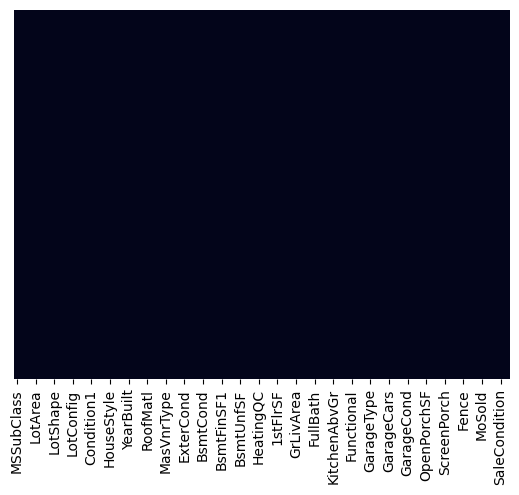

In [89]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = False)

In [90]:
df.shape

(1460, 80)

In [79]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [80]:

df.dropna(inplace=True)

In [81]:

df.shape

(1460, 80)

In [82]:

df_test.shape

(1459, 79)


**4. Feature Engineering**

In [91]:
columns=list(df.select_dtypes(include='object').columns)
columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Converting categorical variables to one hot encoding

In [92]:

# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)

        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:

            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1


    df_final=pd.concat([final_df,df_final],axis=1)

    return df_final

In [93]:
# making a copy of dataframe for future use
main_df=df.copy()

In [94]:
# concanating the test and train files to implement one hot encoding
final_df=pd.concat([df,df_test],axis=0)

In [95]:

final_df.shape

(2919, 80)

In [96]:

final_df=category_onehot_multcols(columns)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [108]:

final_df.shape

(2919, 245)

In [111]:
#removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [112]:
# separating the test and training data
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [113]:

df_Train.shape

(1460, 181)

In [114]:
df_Test.shape

(1459, 181)

In [115]:
# dropping the "SalePrice" column from test data
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [116]:
# preparing data for feeding into model
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [119]:
X_train['GarageYrBlt'] = pd.to_numeric(X_train['GarageYrBlt'])

In [120]:

X_train['GarageYrBlt']

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1455,1999.0
1456,1978.0
1457,1941.0
1458,1950.0


**5. Base Model implementation and evaluating it's RMSE**

In [121]:

# implementing XGBoost regressor
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
import pickle
filename = "finalazied_model.plk"
pickle.dump(classifier,open(filename,'wb'))

In [123]:
df_Test['GarageYrBlt'][1]

1958.0

In [124]:
# predicting the house prices
y_predict = classifier.predict(df_Test)

In [125]:
# displaying the house price
y_predict

array([127577.1 , 155476.64, 197201.81, ..., 149197.6 , 114076.92,
       205005.69], dtype=float32)

In [127]:
pred=pd.DataFrame(y_predict)

In [128]:
pred

,0
0,127577.101562
1,155476.640625
2,197201.812500
3,187297.312500
4,200815.234375
...,...
1454,68555.312500
1455,80564.734375
1456,149197.593750
1457,114076.921875



**6. Hyper parameter tuning**

In [129]:
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]

learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Defining the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


In [130]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

regressor = xgboost.XGBRegressor()
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)


In [131]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [132]:
# finding the best estimate
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Using the above results we tune our regerssor for better performance

In [136]:
# substituting the best parameters
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()', # Changed missing to np.nan
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=2, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints='()', multi_strategy=None, n_estimators=900,
             n_jobs=0, num_parallel_tree=1, ...)

In [137]:
y_predict1 = regressor.predict(df_Test)

In [138]:
y_predict1

array([120140.62, 161310.62, 184762.16, ..., 170014.36, 118260.46,
       233700.92], dtype=float32)

In [139]:
pred.columns = ['SalePrice']

pred

,SalePrice
0,127577.101562
1,155476.640625
2,197201.812500
3,187297.312500
4,200815.234375
...,...
1454,68555.312500
1455,80564.734375
1456,149197.593750
1457,114076.921875
